In [1]:
import os
from pathlib import Path
from operator import itemgetter
import pickle
import pydicom
from time import time
import pandas

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, MultiPolygon, LineString, GeometryCollection, Point, MultiPoint
from shapely.affinity import translate

from catch_converter.parse_contours import parse_cvi42ws
from LazyLuna.Mini_LL import *
from LazyLuna.utils import *
from LazyLuna.Figures import *
from LazyLuna.Views import *

In [2]:
# basepaths
bp       = '/Users/dietrichhadler/Desktop/Daten/CAMAID'
bp_annos1 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Gold'
bp_annos2 = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Reader2'
bp_cases = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases'
bp_imgs  = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Imgs'

In [ ]:
# unpack the workspaces from ws_path to case_storage_path
#cvi42ws_paths     = [f for f in os.listdir(bp_ws) if f.endswith('cvi42ws')]
parse_cvi42ws(bp_annos1, bp_annos1, process=True, debug=False)
parse_cvi42ws(bp_annos2, bp_annos2, process=True, debug=False)

In [ ]:
# get the paths of imgs and annotations via SeriesInstanceUIDs
for bp_annopath in [bp_annos1, bp_annos2]:
    imgsanno_paths = get_imgs_and_annotation_paths(bp_imgs, bp_annopath)

    print('Nr of path tuples: ', len(imgsanno_paths))
    case_names = sorted([c[0] for c in imgsanno_paths])
    from pprint import pprint
    print('Existing Annotations: ', len(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])])))
    pprint(sorted([c[0] for c in imgsanno_paths if os.path.exists(c[1])]))

    cases = []
    sax_cine_view = SAX_CINE_View()
    lax_cine_view = LAX_CINE_View()
    #sax_cs_view   = SAX_CS_View()
    for count, (imgp,annop) in enumerate(imgsanno_paths):
        #if '001_1' not in imgp: continue
        print(count)
        print(os.path.basename(imgp), os.path.basename(annop))
        #if not os.path.exists(imgp) or not os.path.exists(annop):
        #    print(os.path.exists(imgp), os.path.exists(annop))
        #    print('Not converting.'); print()
        #    continue
        st = time()
        try:
            case = Case(imgp, annop, os.path.basename(imgp), os.path.basename(bp_annopath))
            case = sax_cine_view.initialize_case(case)
            case = lax_cine_view.initialize_case(case)
            #case = sax_cine_view.customize_case(case)
            #case = lax_cine_view.customize_case(case)
            case.store(bp_cases)
            cases.append(case)
            print('Case customization took: ', time()-st, 'Case: ', case.reader_name, case.case_name)
        except Exception as e:
            print('Case customization failed: ', e)
        print()

In [3]:
cases  = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'],     key=lambda c: c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='Reader2'],  key=lambda c: c.case_name)

In [4]:
sax_cine_view = SAX_CINE_View()
lax_cine_view = LAX_CINE_View()
case = lax_cine_view.customize_case(cases[0])
for cr in case.crs:
    print(cr.name, cr.get_val())
print()
case = sax_cine_view.customize_case(cases[0])
for cr in case.crs:
    print(cr.name, cr.get_val())

4CV_RAESAREA 21.314966098734867
4CV_RAEDAREA 21.314966098734867
4CV_RAESV 63.39668874867388
4CV_RAEDV 63.39668874867388
4CV_LAESAREA 23.641375437082374
4CV_LAEDAREA 23.641375437082374
4CV_LAESV 94.82654543751511
4CV_LAEDV 94.82654543751511
2CV_LAESAREA 17.001211293593457
2CV_LAEDAREA 17.001211293593457
2CV_LAESV 41.99846672952914
2CV_LAEDV 41.99846672952914
BIPLANE_LAESV 68.19256940084766
BIPLANE_LAEDV 68.19256940084766
LAESP_4CV 14
LAEDP_4CV 14
LAESP_2CV 14
LAEDP_2CV 14
RAESP_4CV 14
RAEDP_4CV 14

starting customize:  Camaid_011_1
ending customize:  Camaid_011_1
LVESV 70.91592258099152
LVEDV 183.76856833154022
RVESV 87.4285823047571
RVEDV 187.58847581161632
LVSV 112.8526457505487
LVEF 61.41020021842641
RVSV 100.15989350685922
RVEF 53.393415066664204
LVM 95.63637072232714
RVM 0.0
LVESP 12
RVESP 12
LVEDP 29
RVEDP 29
NrSlices 18


/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:118: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  ra_ext1, ra_ext2, ceil = scale(extent, xfact=pw, yfact=ph)
/Users/dietrichhadler/Documents/GitHub/LazyLuna/src/LazyLuna/Mini_LL.py:109: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  la_ext1, la_ext2, ceil = scale(extent, xfact=pw, yfact=ph)


In [5]:
cases  = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'],     key=lambda c: c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='Reader2'],  key=lambda c: c.case_name)
sax_cine_view = SAX_CINE_View()
lax_cine_view = LAX_CINE_View()
ccs = []
for c1,c2 in zip(cases1,cases2):
    try:
        cc = Case_Comparison(sax_cine_view.customize_case(c1), sax_cine_view.customize_case(c2))
        ccs.append(cc)
    except: continue

#for cr in ccs[0].case1.crs:
#    print(cr.name, cr.get_val())
#for cr in ccs[0].case2.crs:
#    print(cr.name, cr.get_val())
##table = CC_Metrics_Table()
#table.calculate(ccs[0])
#table.present_contour_df('lv_endo')
#display(table.df)

starting customize:  CAMAID_001_1
ending customize:  CAMAID_001_1
starting customize:  CAMAID_001_1
ending customize:  CAMAID_001_1
starting customize:  CAMAID_002_1
ending customize:  CAMAID_002_1
starting customize:  CAMAID_002_1
ending customize:  CAMAID_002_1
starting customize:  CAMAID_003_1
ending customize:  CAMAID_003_1
starting customize:  CAMAID_003_1
ending customize:  CAMAID_003_1
starting customize:  Camaid_004_1
ending customize:  Camaid_004_1
starting customize:  Camaid_004_1
ending customize:  Camaid_004_1
starting customize:  Camaid_005_1
starting customize:  Camaid_006_1
ending customize:  Camaid_006_1
starting customize:  Camaid_006_1
ending customize:  Camaid_006_1
starting customize:  Camaid_007_1
ending customize:  Camaid_007_1
starting customize:  Camaid_007_1
ending customize:  Camaid_007_1
starting customize:  Camaid_008_1
ending customize:  Camaid_008_1
starting customize:  Camaid_008_1
ending customize:  Camaid_008_1
starting customize:  Camaid_009_1
ending c

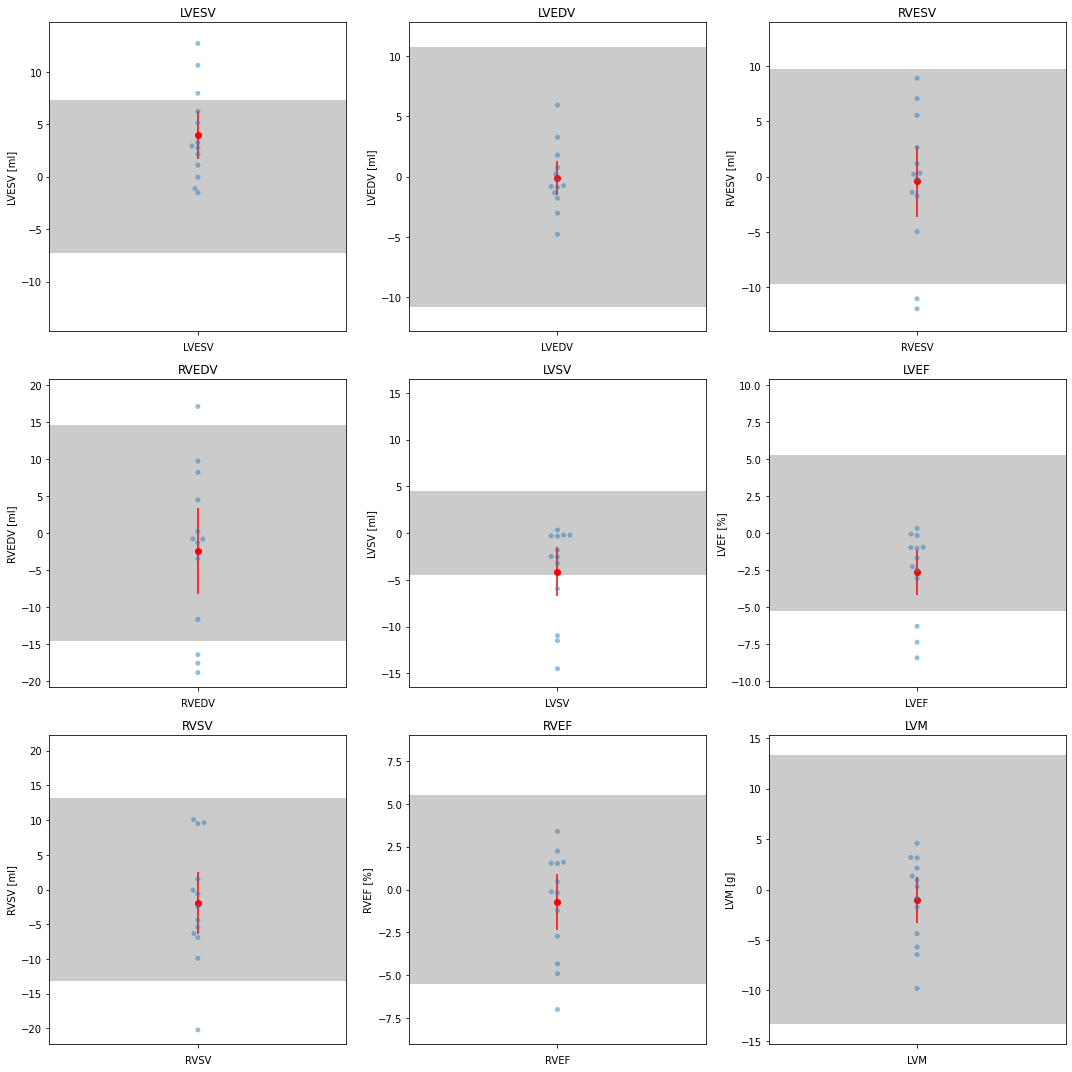

None


In [126]:
from matplotlib.patches import Rectangle

# make figure
def tol_ranges_saxcine(ccs, with_swarmplot=True):
    vals = {cr.name:[] for cr in ccs[0].case1.crs}
    for cc in ccs:
        c1,  c2  = cc.case1, cc.case2
        for name in [cr.name for cr in c1.crs]:
            cr1, cr2 = [cr for cr in c1.crs if cr.name==name][0], [cr for cr in c2.crs if cr.name==name][0]
            vals[cr1.name].append(cr1.get_val_diff(cr2))
    
    fig, axes = plt.subplots(3,3, figsize=(15,15))
    for i, ax_ in enumerate(axes):
        for j, ax in enumerate(ax_):
            cr = ccs[0].case1.crs[i*3+j]
            name = cr.name
            ax.set_title(name)
            ax.axhspan(-cr.tol_range, cr.tol_range, facecolor='0.6', alpha=0.5)
            alpha = 0.5 if with_swarmplot else 0.0
            sns.swarmplot(ax=ax, y=vals[name], palette=sns.color_palette("Blues")[4:], dodge=True, size=5, alpha=alpha)
            ci = 1.96 * np.std(vals[name]) / np.sqrt(len(vals[name]))
            ax.errorbar([name], [np.mean(vals[name])], yerr=ci, fmt ='o', c='r')
            maxx = np.max([np.abs(np.min(vals[name])), np.abs(np.max(vals[name])),
                           np.abs(np.mean(vals[name])-ci), np.abs(np.mean(vals[name])+ci), cr.tol_range])
            ax.set_ylim(ymin=-maxx-2, ymax=maxx+2)
            ax.set_ylabel(name + ' ' + cr.unit)
            ax.set_xlabel(name)
    
    fig.tight_layout()
    plt.show()

print(tol_ranges_saxcine(ccs, True))

In [29]:
cases  = [pickle.load(open(os.path.join(bp_cases, p), 'rb')) for p in os.listdir(bp_cases)]
cases1 = sorted([c for c in cases if c.reader_name=='Gold'],     key=lambda c: c.case_name)
cases2 = sorted([c for c in cases if c.reader_name=='Reader2'],  key=lambda c: c.case_name)
print(len(cases1))
print(len(cases2))
t1_view = SAX_T1_View()
t1_ccs = []
for c1,c2 in zip(cases1,cases2):
    try:
        cc = Case_Comparison(t1_view.customize_case(c1), t1_view.customize_case(c2))
        t1_ccs.append(cc)
    except: continue

15
15


In [31]:
m = T1AvgDiffMetric()
dices, hds = [], []
t_globals = []
api_tdiffs = []
for cc in t1_ccs:
    c1,     c2 = cc.case1, cc.case2
    cr1,   cr2 = [cr for cr in c1.crs if 'global' in cr.name.lower()][0], [cr for cr in c2.crs if 'global' in cr.name.lower()][0]
    t_globals.append(cr1.get_val_diff(cr2))
    cat1, cat2 = c1.categories[0], c2.categories[0]
    for d in range(cat1.nr_slices):
        if d!=cat1.nr_slices-1: continue
        img1,  img2  = cat1.get_img(d,0),  cat2.get_img(d,0)
        anno1, anno2 = cat1.get_anno(d,0), cat2.get_anno(d,0)
        myo1,  myo2  = anno1.get_contour('lv_myo'), anno2.get_contour('lv_myo')
        dices.append(dice(myo1, myo2))
        hds.append(hausdorff(myo1, myo2))
        api_tdiffs.append(m.get_val(myo1, myo2, img1, img2))
#print(t_globals)
print(api_tdiffs)
print(np.mean(api_tdiffs[:-2]), np.std(api_tdiffs))
print(np.mean(t_globals), np.std(t_globals))
print(np.mean(dices), np.std(dices))
print(np.mean(hds), np.std(dices))

[23.63152173913045, -21.239940387481397, -21.381890687309465, -23.56276118835956, 0.0, -11.894949494949515, 4.633272861654177, -5.334532374100718, -5.310309843150776, 5.788746081504769, 0.0, 0.0]
-5.4670843293062035 12.99365552789535
0.3233187699670263 5.409778319487604
78.05911080338272 14.484003135856227
1.273636919235483 14.484003135856227


In [ ]:
st = time()
#metrics_table = LAX_CC_Metrics_Table()
metrics_table.calculate(Case_Comparison(lax_cine_view.customize_case(cases1[0]), lax_cine_view.customize_case(cases2[0])))
metrics_table.present_contour_df('lv_lax_endo')
display(metrics_table.df)
print('took : ', time()-st)

In [ ]:
#metrics_table.store('/Users/dietrichhadler/Desktop/Export_comparison_Gold_Reader2/fdsfdsf.csv')

        
class SAX_Cine_CCs_pretty_averageCRs_averageMetrics_Table(Table):
    def calculate(self, case_comparisons, view):
        cr_table = CC_ClinicalResultsTable()
        cr_table.calculate(case_comparisons, with_dices=True)
        means_cr_table = cr_table.df[['LVEF difference', 'LVEDV difference', 'LVESV difference', 'lv_endo avg dice', 
                             'lv_endo avg dice cont by both', 'lv_endo avg HD', 'LVM difference', 'lv_myo avg dice', 
                            'lv_myo avg dice cont by both', 'lv_myo avg HD', 'RVEF difference', 'RVEDV difference', 
                            'RVESV difference', 'rv_endo avg dice', 'rv_endo avg dice cont by both', 'rv_endo avg HD', 
                            'avg dice', 'avg dice cont by both', 'avg HD']].mean(axis=0)
        std_cr_table = cr_table.df[['LVEF difference', 'LVEDV difference', 'LVESV difference', 'lv_endo avg dice', 
                             'lv_endo avg dice cont by both', 'lv_endo avg HD', 'LVM difference', 'lv_myo avg dice', 
                            'lv_myo avg dice cont by both', 'lv_myo avg HD', 'RVEF difference', 'RVEDV difference', 
                            'RVESV difference', 'rv_endo avg dice', 'rv_endo avg dice cont by both', 'rv_endo avg HD', 
                            'avg dice', 'avg dice cont by both', 'avg HD']].std(axis=0)
        cr_table = pandas.concat([means_cr_table, std_cr_table], axis=1).reset_index()
        cr_table.columns = ['Name', 'Mean', 'Std']
        names = cr_table['Name']
        new_names = []
        for i, n in names.iteritems():
            n = n.replace(' difference', '').replace('avg HD','HD').replace('avg dice', 'Dice').replace('lv_endo', '').replace('rv_endo', '').replace('lv_myo','')
            if 'cont by both' in n: n = n.replace('cont by both', '(slices contoured by both)')
            elif 'Dice' in n:       n = n + ' (all slices)'
            if i>15:                     n = n + ' (all contours)'
            n = n.replace(') (', ', ')
            if 'HD' in n:                n = n + ' [mm]'
            if 'EF' in n or 'Dice' in n: n = n + ' [%]'
            if 'ESV' in n or 'EDV' in n: n = n + ' [ml]'
            if 'LVM' in n:               n = n + ' [g]'
            new_names.append(n)
        cr_table['Name'] = new_names
        self.cr_table = cr_table
        #display(cr_table)
        
        metrics_table = CCs_MetricsTable()
        metrics_table.calculate(case_comparisons, view)
        metrics_table = metrics_table.df
        
        rows = []
        for position in ['basal', 'midv', 'apical']:
            # Precision = tp / tp + fp
            # Recall    = tp / tp + fn
            # dice all slices
            # dice by both
            row1, row2 = [position, 'Dice (all slices) [%]'], [position, 'Dice (slices contoured by both) [%]']
            row3, row4 = [position, 'HD [mm]'], [position, 'Abs. ml diff. (per slice) [ml]']
            for contname in ['lv_endo', 'lv_myo', 'rv_endo']:
                print(position, contname)
                subtable = metrics_table[[k for k in metrics_table.columns if contname in k]]
                #display(subtable)
                dice_ks     = [k for k in subtable.columns if 'DSC' in k]
                position_ks = [k for k in subtable.columns if 'position1' in k]
                all_dices = []
                for ki in range(len(dice_ks)): all_dices.extend([d for d in subtable[subtable[position_ks[ki]]==position][dice_ks[ki]]])
                #print('all dices: ', all_dices)
                row1.append(np.mean(all_dices))
                row2.append(np.mean([d for d in all_dices if 0<d<100]))
                hd_ks = [k for k in subtable.columns if 'HD' in k]
                hds   = []
                for ki in range(len(hd_ks)): hds.extend([d for d in subtable[subtable[position_ks[ki]]==position][hd_ks[ki]]])
                #print('hds: ', hds)
                row3.append(np.mean(hds))
                # abs ml diff
                mld_ks = [k for k in subtable.columns if 'abs ml diff' in k]
                mlds   = []
                for ki in range(len(mld_ks)): mlds.extend([d for d in subtable[subtable[position_ks[ki]]==position][mld_ks[ki]]])
                #print('mlds: ', mlds)
                row4.append(np.mean(mlds))
            rows.extend([row1, row2, row3, row4])
        self.metrics_table = pandas.DataFrame(rows, columns=['Position', 'Metric', 'LV Endocardial Contour', 'LV Myocardial Contour', 'RV Endocardial Contour'])
        #display(self.metrics_table)
        
    def present_metrics(self):
        self.df = self.metrics_table
    
    def present_crs(self):
        self.df = self.cr_table
        
table = SAX_Cine_CCs_pretty_averageCRs_averageMetrics_Table()
table.calculate(ccs, sax_cine_view)
table.present_metrics()
display(table.df)
table.store('/Users/dietrichhadler/Desktop/metrics_table_by_contour_position.csv')
table.present_crs()
display(table.df)
table.store('/Users/dietrichhadler/Desktop/crvs_and_metrics.csv')

In [ ]:
def siuids(path, name):
    siuidss = set()
    img_folders = os.listdir(path)
    for i, img_f in enumerate(img_folders):
        #print(img_f)
        #print(name)
        if name not in img_f: continue
        case_path = os.path.join(bp_imgs, img_f)
        print(case_path)
        for p in Path(case_path).glob('**/*.dcm'):
            dcm = pydicom.dcmread(str(p), stop_before_pixels=True)
            siuidss.add(dcm.StudyInstanceUID)
    print(siuidss)
            
siuids('/Users/dietrichhadler/Desktop/Daten/CAMAID/Imgs', '018_1')

In [ ]:
display(df['annotated'])
display(df.loc[df['annotated'].isin([0])])

In [ ]:
for k, v in df[['case','series_descr', 'annotated']].value_counts().iteritems():
    if k[-1]>0:
        print(k[-1], l)

In [ ]:
print('Cine SAX images:')
curr = None
for k,v in sorted(df[['case','series_descr']].value_counts().iteritems()):
    if curr is None or curr!=k[0]: print(k[0])
    curr = k[0]
    if 'RV 7 0' in k[1] or k[1]=='SAX CINE':
        print('\t', k[1], v)
print('Camaid_005_1 und Camaid_015_1 nicht segmentiert, da Vorhofflimmern')

In [ ]:
print('4CH View images:')

curr = None
for k,v in sorted(df[['case','series_descr']].value_counts().iteritems()):
    if curr is None or curr!=k[0]: print(k[0])
    curr = k[0]
    if 'cine_tf2d12' in k[1] and ('2 cv' in k[1] or '2cv' in k[1]):
        print('\t', k[1],v)
    if 'cine_tf2d12' in k[1] and ('3 cv' in k[1] or '3cv' in k[1]):
        print('\t', k[1], v)
    if 'cine_tf2d12' in k[1] and ('4 cv' in k[1] or '4cv' in k[1]):
        print('\t', k[1], v)
print('Several cases have two or more series of LAX')

In [ ]:
print('T1 images:')
for k,v in sorted(df[['case','series_descr']].value_counts().iteritems()):
    if curr is None or curr!=k[0]: print(k[0])
    curr = k[0]
    #if curr!='Camaid_011_2': continue
    if 'pre_MOLLI' in k[1] and 'T1' in k[1] and 'T1S' not in k[1] and '4cv' not in k[1]:
        print('\t', k[1], v)
    #print('\t', k[1], v)
print('T1 fehlt bei Camaid 11')

In [ ]:
print('T2 images:')
for k,v in sorted(df[['case','series_descr']].value_counts().iteritems()):
    if curr is None or curr!=k[0]: print(k[0])
    curr = k[0]
    #if curr!='Camaid_011_2': continue
    if 'T2' in k[1] and 'MOCO_T2' in k[1] and '4cv' not in k[1]:
        print('\t', k[1], v)
    #print('\t', k[1], v)
print('Viele Fälle bereits 3 aus 5 definiert.')

In [ ]:
def add_LL_tag(store_path, dcm, tag='Lazy Luna: None'): # Lazy Luna: SAX CS
    try:    dcm[0x0b, 0x10].value = tag
    except: dcm.private_block(0x000b, tag, create=True)
    dcm.save_as(filename=store_path, write_like_original=False)
    
all_cases = os.listdir(bp_imgs)
print('All cases: ', all_cases)

columns = ['case', 'series_descr', 'suid']
for i_c, c in enumerate(all_cases):
    for ip, p in enumerate(Path(os.path.join(bp_imgs, c)).glob('**/*.dcm')):
        p = str(p)
        dcm = pydicom.dcmread(p, stop_before_pixels=False)
        #print(dcm.SeriesDescription)
        try:
            if 'RV 7 0' in dcm.SeriesDescription: add_LL_tag(p, dcm, tag='Lazy Luna: SAX CINE')
            else:                                 add_LL_tag(p, dcm, tag='Lazy Luna: None')
        except:
            print('Failed at: Case', c)
            print(dcm)
            continue
    print(i_c, 'Done for', c)


In [ ]:
for i_c, c in enumerate(all_cases):
    for ip, p in enumerate(Path(os.path.join(bp_imgs, c)).glob('**/*.dcm')):
        p = str(p)
        dcm = pydicom.dcmread(p, stop_before_pixels=False)
        name = str(dcm[0x0b, 0x10].value).replace('Lazy Luna: ', '') # LL Tag
        print(name)

In [ ]:
# 1st: (tool 1)
# sort all images for one case
# get all annos for each image and offer that as info too
# add LL image tags for what we have here
#
# 2nd: (tool 2)
# make cases, AFTER images are defined
# created cases: connect annos to images
# 

In [ ]:
case_path = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases/Gold_Camaid_007_1_LL_case.pickle'
case = pickle.load(open(case_path, 'rb'))
print(case.case_name)

print(case.type)
print(case.categories)
print(case.other_categories)
print(case.all_imgs_sop2filepath.keys())
for k in case.all_imgs_sop2filepath.keys():
    print(k, len(case.all_imgs_sop2filepath[k]), end=', ')
for cr in case.crs:
    print(cr.name, cr.get_cr(), end=', ')

In [ ]:
view = SAX_CINE_View()
case = view.customize_case(case)
print(case.case_name)

print(case.type)
print(case.categories)
print(case.other_categories)
print(case.all_imgs_sop2filepath.keys())
for k in case.all_imgs_sop2filepath.keys():
    print(k, len(case.all_imgs_sop2filepath[k]), end=', ')
for cr in case.crs:
    print(cr.name, cr.get_cr(), end=', ')

In [ ]:
from LazyLuna.loading_functions import *

view       = Mini_LL.SAX_CINE_View()
case_paths = '/Users/dietrichhadler/Desktop/Daten/CAMAID/Cases'
paths      = [str(p) for p in Path(case_paths).glob('**/*.pickle')]
all_cases  = [pickle.load(open(p,'rb')) for p in paths]
cases1     = sorted([c for c in all_cases if c.reader_name=='Gold'],    key=lambda c:c.case_name)
cases2     = sorted([c for c in all_cases if c.reader_name=='Reader2'], key=lambda c:c.case_name)
ccs = []
for c1,c2 in zip(cases1,cases2):
    try:ccs.append(Mini_LL.Case_Comparison(view.customize_case(c1), view.customize_case(c2)))
    except: continue
print(len(ccs))

In [ ]:
ba = BlandAltman()
ba.visualize(ccs, 'RVESV')
ba.store('/Users/dietrichhadler/Desktop')

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
h, w = 5,5
ax.imshow(np.arange(h*w).reshape(h,w), extent=(0, w, h, 0))
plt.show()